In [67]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [68]:
customers = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_customers_dataset.csv')
order_items = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_orders_dataset.csv')
products = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_products_dataset.csv')
sellers = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_sellers_dataset.csv')
order_payments = pd.read_csv('/Users/borisudovicic/downloads/archive/olist_order_payments_dataset.csv')

In [3]:
!pip install googletrans

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
!pip install pqdm

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [54]:
from googletrans import Translator
from tqdm import tqdm

In [69]:
order_reviews.dropna(subset=['review_comment_message'], inplace=True)
# Removes reviews which do not have any text in the 'review_comment_message' field

In [70]:
order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,reviewss
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,NaN
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,NaN
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,NaN
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2/16/18 0:00,2/20/18 10:52,NaN
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",5/23/18 0:00,5/24/18 3:00,NaN
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",1/18/18 0:00,1/20/18 21:25,NaN
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,8/15/18 0:00,8/15/18 4:10,NaN
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,7/10/18 0:00,7/11/18 14:10,NaN
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,12/1/17 0:00,12/9/17 22:58,NaN
27,fe3db7c069d694bab50cc43463f91608,2ca73e2ff9e3a186ad1e1ffb9b1d9c10,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,3/23/18 0:00,4/1/18 0:27,NaN


In [71]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 3 to 99999
Data columns (total 8 columns):
review_id                  41753 non-null object
order_id                   41753 non-null object
review_score               41753 non-null int64
review_comment_title       9986 non-null object
review_comment_message     41753 non-null object
review_creation_date       41753 non-null object
review_answer_timestamp    41753 non-null object
reviewss                   0 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.9+ MB


Text(0, 0.5, 'Percent of Reviews')

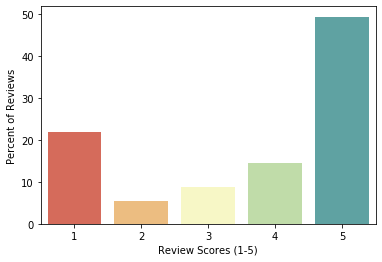

In [72]:
review_info = order_reviews['review_score'].value_counts().to_frame().reset_index()
review_info['score'] = review_info['index']
review_info['review_percentage'] = review_info ['review_score'] / sum(review_info['review_score']) * 100
sns.barplot(x='score',y='review_percentage',data=review_info,palette = "Spectral")
plt.xlabel('Review Scores (1-5)')
plt.ylabel('Percent of Reviews')

In [73]:
df2 = order_reviews.query('review_score == 1')
df2.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,reviewss
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,8/15/18 0:00,8/15/18 4:10,NaN
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,NaN,Não gostei ! Comprei gato por lebre,12/13/17 0:00,12/16/17 7:14,NaN
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,4/8/18 0:00,4/9/18 12:22,NaN
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,4/21/17 0:00,4/23/17 5:37,NaN
51,e233e51d11511bf30e568c76360ace52,548df2c6e5f089574614894bca78acf5,1,NaN,recebi somente 1 controle Midea Split ESTILO.\...,1/28/18 0:00,2/4/18 11:06,NaN


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9179 entries, 19 to 99999
Data columns (total 8 columns):
review_id                  9179 non-null object
order_id                   9179 non-null object
review_score               9179 non-null int64
review_comment_title       1873 non-null object
review_comment_message     9179 non-null object
review_creation_date       9179 non-null object
review_answer_timestamp    9179 non-null object
reviewss                   0 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 645.4+ KB


In [78]:
import nltk
import unicodedata

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/borisudovicic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
def normalize(sentence):
    return unicodedata.normalize('NFKD', sentence).encode('ascii', errors='ignore').decode('utf-8')
    #  NFKD - replace all compatibility characters with their equivalents
    stopwords_ = set(normalize(w) for w in nltk.corpus.stopwords.words('portuguese'))
 
def sentences(sentence):
    normalized = normalize(sentence.lower())
    tokens = nltk.tokenize.word_tokenize(normalized)
    words = tuple(t for t in tokens if t not in stopwords_ and t.isalpha())
    return words

def ngrams(words):
    bigrams = []
    for w in words:
        bigrams.extend(' '.join(bigram) for bigram in nltk.bigrams(w))
    return bigrams
    # N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words

In [106]:
order_reviews['review_words'] = order_reviews['review_comment_message'].apply(sentences)
negative_reviews = order_reviews[order_reviews['review_score'] == 1]
negative_bigrams = ngrams(negative_reviews['review_words'])

In [107]:
relevant25_negative = dict(Counter(negative_bigrams).most_common(25))

In [108]:
bigrams = pd.DataFrame(list(zip(relevant25_negative.keys(), relevant25_negative.values())),
columns =['negative_review (1 rating)', 'count'])

In [109]:
bigrams

,negative_review (1 rating),count
0,recebi produto,1113
1,produto entregue,404
2,ainda recebi,383
3,produto veio,289
4,produto chegou,268
5,nota fiscal,219
6,comprei produto,202
7,produto ainda,198
8,prazo entrega,195
9,recebi apenas,173


In [57]:
for i in tqdm(range(bigrams.shape[0])) :
    translator = Translator()
    bigrams.iloc[i,0] = translator.translate(bigrams.iloc[i,0], src='pt', dest='en').text
    
        # Google's translator library seems to not be working. Users at github and stackoverflow are having the same issue
        # For a workaround I will simply use the web version of Google Translator manually to translate from Portugese 
        # Results show that most negative reviews stem from either not getting the item on time or not at all
        # as well as product quality not being up to customer expectations

  0%|          | 0/25 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'group'

Text(0, 0.5, 'Count')

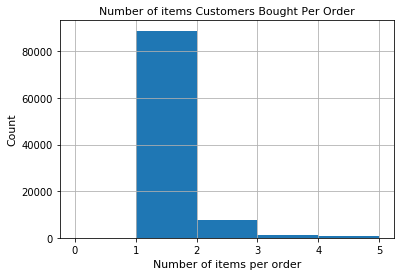

In [145]:
order_count = order_items.groupby('order_id').agg({'order_id':['count']})
s = order_count['order_id']['count']
count, division = np.histogram(s, bins = list(range(0,6,1)))
s.hist(bins=division)
plt.title('Number of items Customers Bought Per Order', fontsize=11)
plt.xlabel('Number of items per order', fontsize=11)
plt.ylabel('Count', fontsize=11)

In [88]:
reviews_items = pd.merge(pd.merge(order_items, order_reviews, on='order_id'), products, on= 'product_id')
product_category_reviews = reviews_items.groupby(['product_category_name']).agg(
{'review_score':['mean','count']})

Text(0, 0.5, 'Product Category')

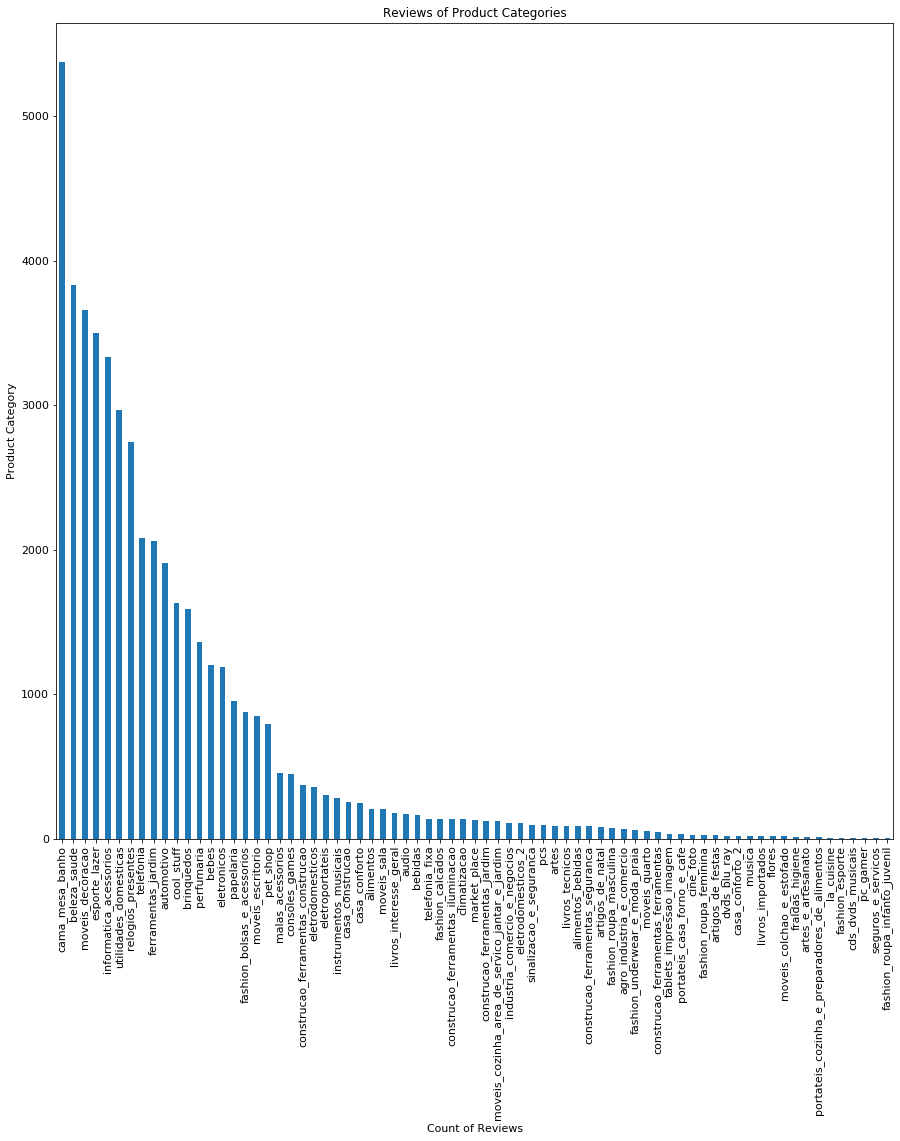

In [89]:
e = product_category_reviews['review_score']['count']
e = e.sort_values(ascending=False)
plt.figure(figsize=(15, 15))
u = e.plot(kind='bar', fontsize=11)
u.set_title('Reviews of Product Categories')
u.set_xlabel('Count of Reviews', fontsize=11)
u.set_ylabel('Product Category', fontsize=11)

# Once again the lack of Google's translator library creates the need to manually translate the product categories

In [139]:
profit_over_time = pd.merge(orders, order_payments, on='order_id')
profit_over_time = profit_over_time[['order_id','order_purchase_timestamp', 'payment_value']]
profit_over_time['Year'] = pd.DatetimeIndex(profit_over_time['order_purchase_timestamp']).year
profit_over_time['Month'] = pd.DatetimeIndex(profit_over_time['order_purchase_timestamp']).month
time_revenue_df['Month_Year'] = pd.to_datetime(time_revenue_df['order_purchase_timestamp']).dt.to_period('M')

profit_over_time.head(10)

,order_id,order_purchase_timestamp,payment_value,Year,Month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12,2018,8
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,72.20,2017,11
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,28.62,2018,2
7,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,175.26,2017,7
8,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,65.95,2017,4
9,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,75.16,2017,5


In [142]:
profit_over_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                    103886 non-null object
order_purchase_timestamp    103886 non-null object
payment_value               103886 non-null float64
Year                        103886 non-null int64
Month                       103886 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [130]:
profit_by_month = time_revenue_df.groupby('month_year',as_index=False).agg({'order_id':['count'],'payment_value':['sum']})
profit_by_month

,month_year,order_id,payment_value
,,count,sum
0,2016-09,3,252.24
1,2016-10,342,59090.48
2,2016-12,1,19.62
3,2017-01,850,138488.04
4,2017-02,1886,291908.01
5,2017-03,2837,449863.60
6,2017-04,2571,417788.03
7,2017-05,3944,592918.82
8,2017-06,3436,511276.38


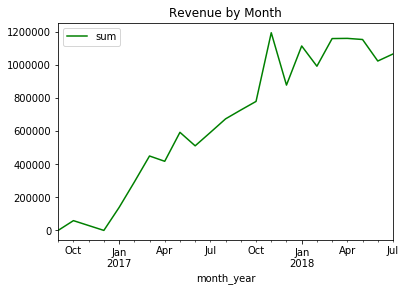

In [138]:
profit_by_month[:-3].plot(x='month_year', y='payment_value',title='Revenue by Month', color = 'green')